In [69]:
# importing numpy and sklearn and pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from prettytable import PrettyTable
import pickle5 as pickle


In [70]:
# importing the dataset with pickle and splitting it into 20 sets
with open('train_dataset.pickle', 'rb') as f:
    trainset = pickle.load(f)
with open('test_dataset.pickle', 'rb') as f:
    testset = pickle.load(f)
# np.random.shuffle(trainset)
trainset = np.array_split(trainset, 20)

In [71]:
# calculating y_avg_list that corresponds for 15 models with degree 1 to 15 
all_degrees = []
for degree in range(0, 15):
    avg_ypred = np.zeros(len(testset))
    for set in trainset:
        X = set[:, 0]
        y = set[:, 1]
        testX = testset[:, 0]
        X = X.reshape(-1, 1)
        poly = PolynomialFeatures(degree=degree+1)
        X_poly = poly.fit_transform(X)
        testX = testX.reshape(-1, 1)
        testX_poly = poly.fit_transform(testX)
        lin2 = LinearRegression()
        lin2.fit(X_poly, y)
        y_pred = lin2.predict(testX_poly)
        avg_ypred = avg_ypred + y_pred
    avg_ypred = avg_ypred / 20
    all_degrees.append(avg_ypred)

In [72]:
bias_list = []
bias_square_list = []
variance_list = []
mse_list = []
irreducible_error_list = []
variance = 0
bias = 0
bias_square = 0
mse = 0
for degree in range(0, 15):
    # re-initializing the values for each degree
    variance = 0
    bias = 0
    bias_square = 0
    mse = 0
    testX = testset[:, 0]
    testy = testset[:, 1]
    for set in trainset:
        X = set[:, 0]
        y = set[:, 1]
        X = X.reshape(-1, 1)
        poly = PolynomialFeatures(degree=degree+1)
        X_poly = poly.fit_transform(X)
        testX = testX.reshape(-1, 1)
        testX_poly = poly.fit_transform(testX)
        lin2 = LinearRegression()
        lin2.fit(X_poly, y)
        y_pred = lin2.predict(testX_poly)
        variance += np.mean((y_pred - all_degrees[degree]) ** 2)
        mse += np.mean((y_pred - testy) ** 2) 
    mse/=20
    bias = np.mean(abs(all_degrees[degree] - testy))
    bias_square = np.mean((all_degrees[degree] - testy) ** 2)
    variance/= 20
    irreducible_error = mse - bias_square - variance
    bias_list.append(bias)
    bias_square_list.append(bias_square)
    variance_list.append(variance)
    mse_list.append(mse)
    irreducible_error_list.append(irreducible_error)
table = PrettyTable()
table.field_names = ["degree_values", "bias_values", "variance_values", "bias_square_values", "mse_values", "irreducible error_values"]
for degree in range(0, 15):
    table.add_row([degree+1, bias_list[degree], variance_list[degree], bias_square_list[degree], mse_list[degree], irreducible_error_list[degree]])
print(table)

+---------------+----------------------+-----------------------+----------------------+-----------------------+--------------------------+
| degree_values |     bias_values      |    variance_values    |  bias_square_values  |       mse_values      | irreducible error_values |
+---------------+----------------------+-----------------------+----------------------+-----------------------+--------------------------+
|       1       |  0.2693981786278067  |  0.008680951616483062 | 0.11439213326826278  |  0.12307308488474586  |  1.734723475976807e-17   |
|       2       | 0.08625653626329853  | 0.0012243578446454947 | 0.012141228266904686 |  0.013365586111550174 |  -6.938893903907228e-18  |
|       3       | 0.033271827344580666 | 0.0003373394299752775 | 0.00470811391264546  | 0.0050454533426207435 |  6.071532165918825e-18   |
|       4       | 0.02428263055266457  | 0.0003669994779255658 | 0.004239099877347178 |  0.004606099355272742 | -1.4094628242311558e-18  |
|       5       | 0.0238793

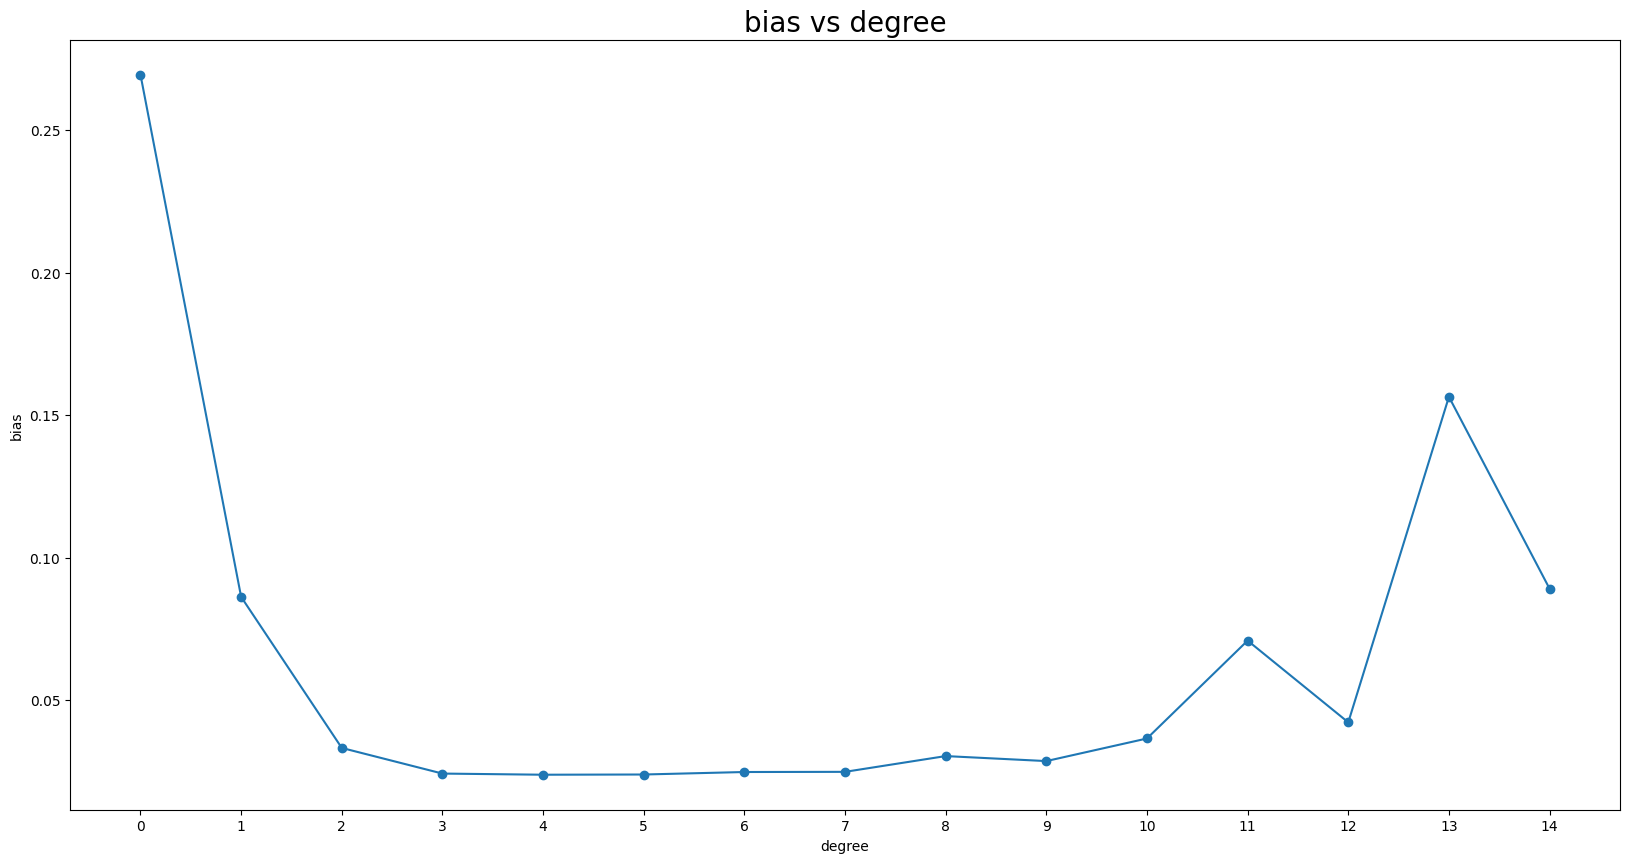

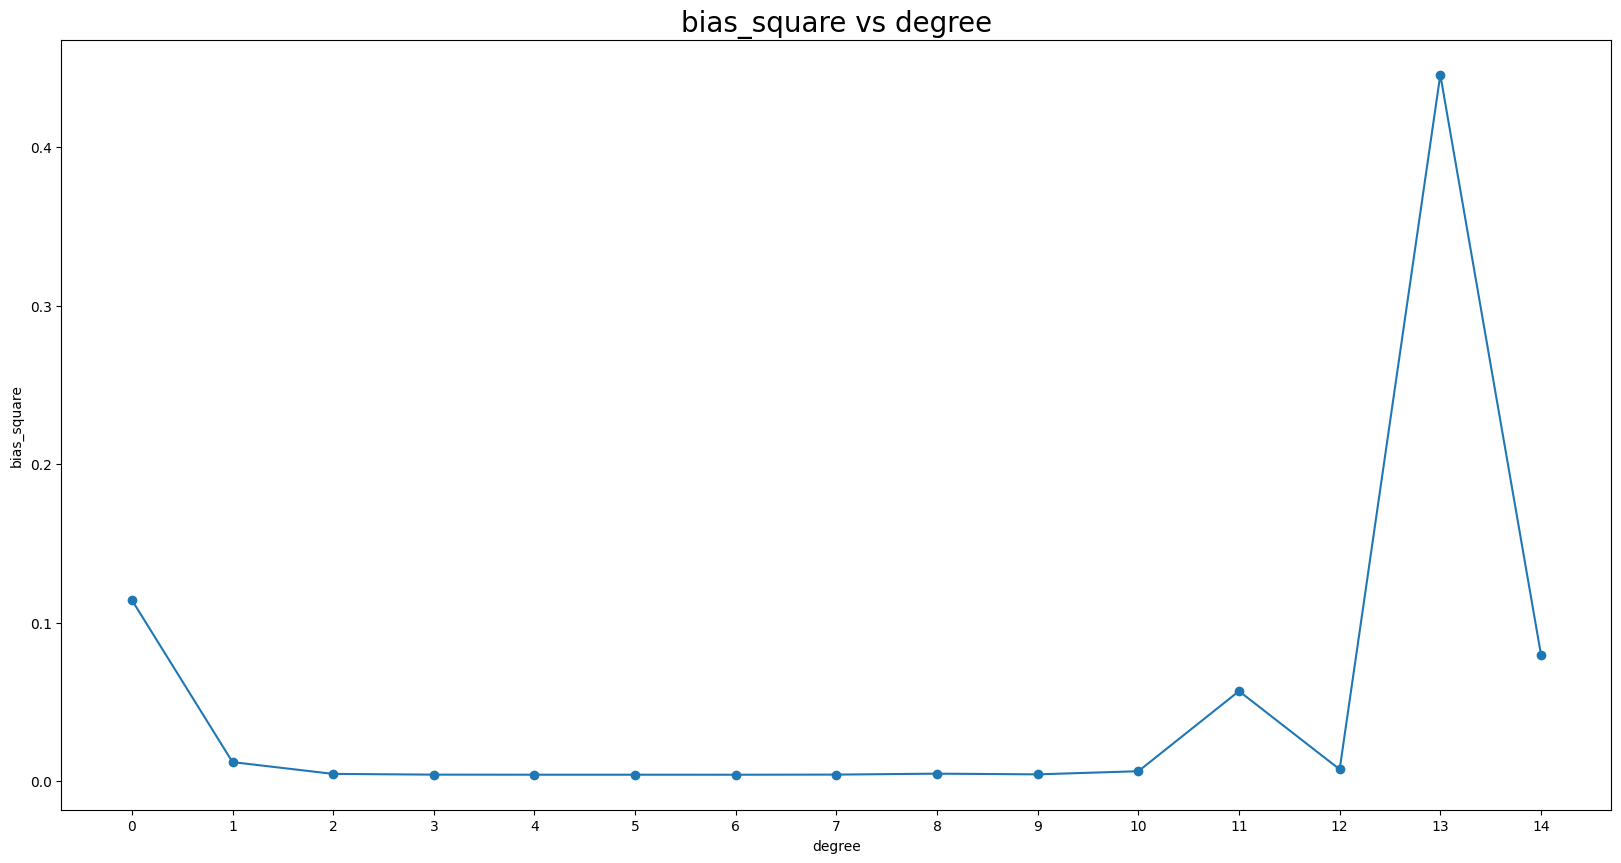

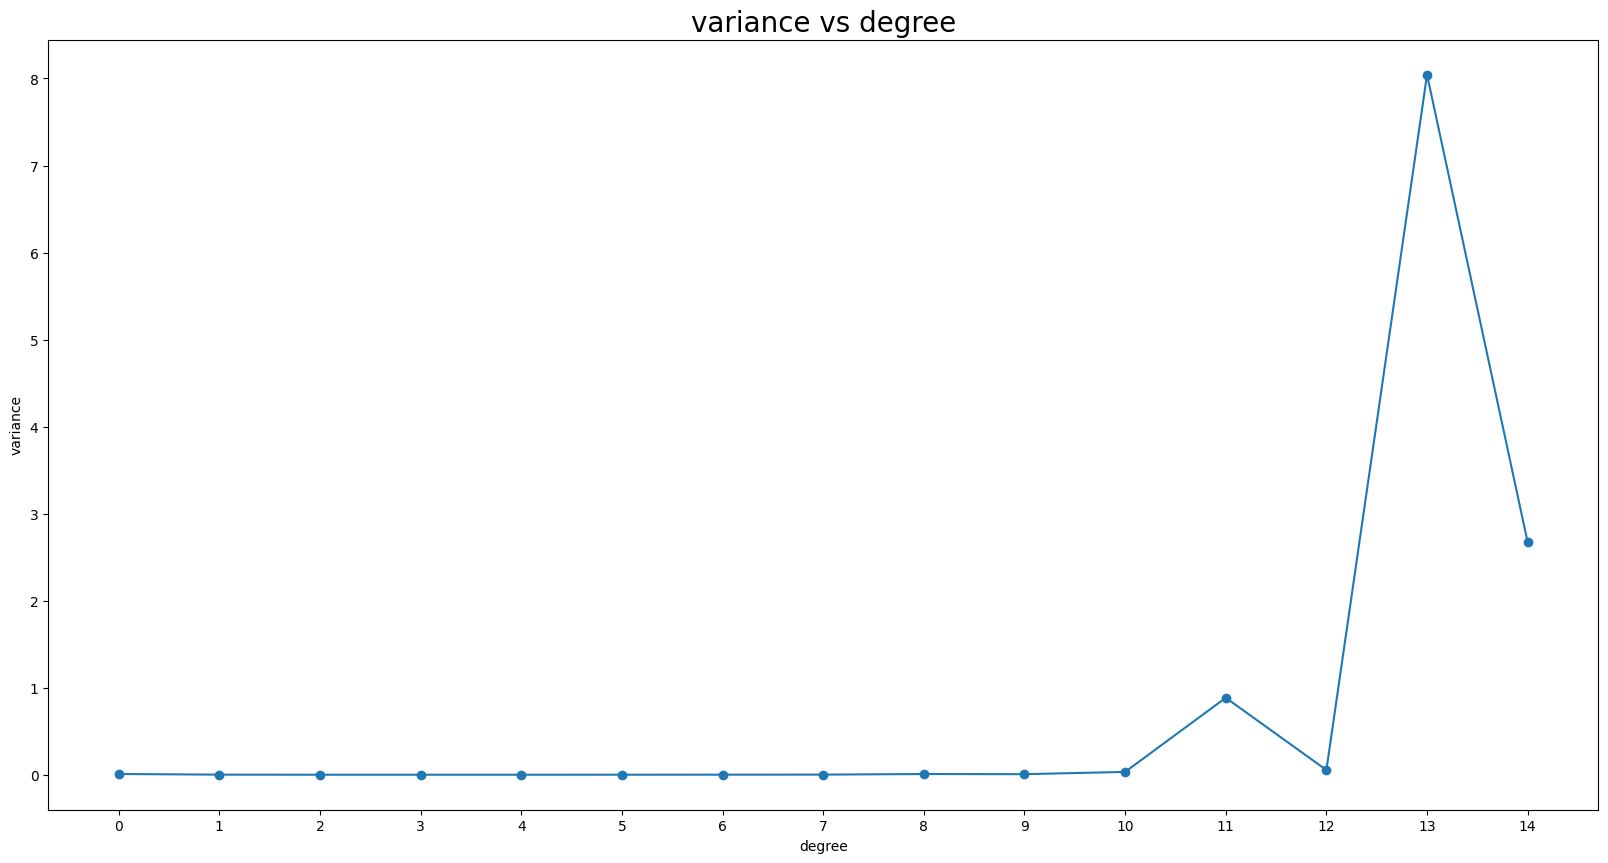

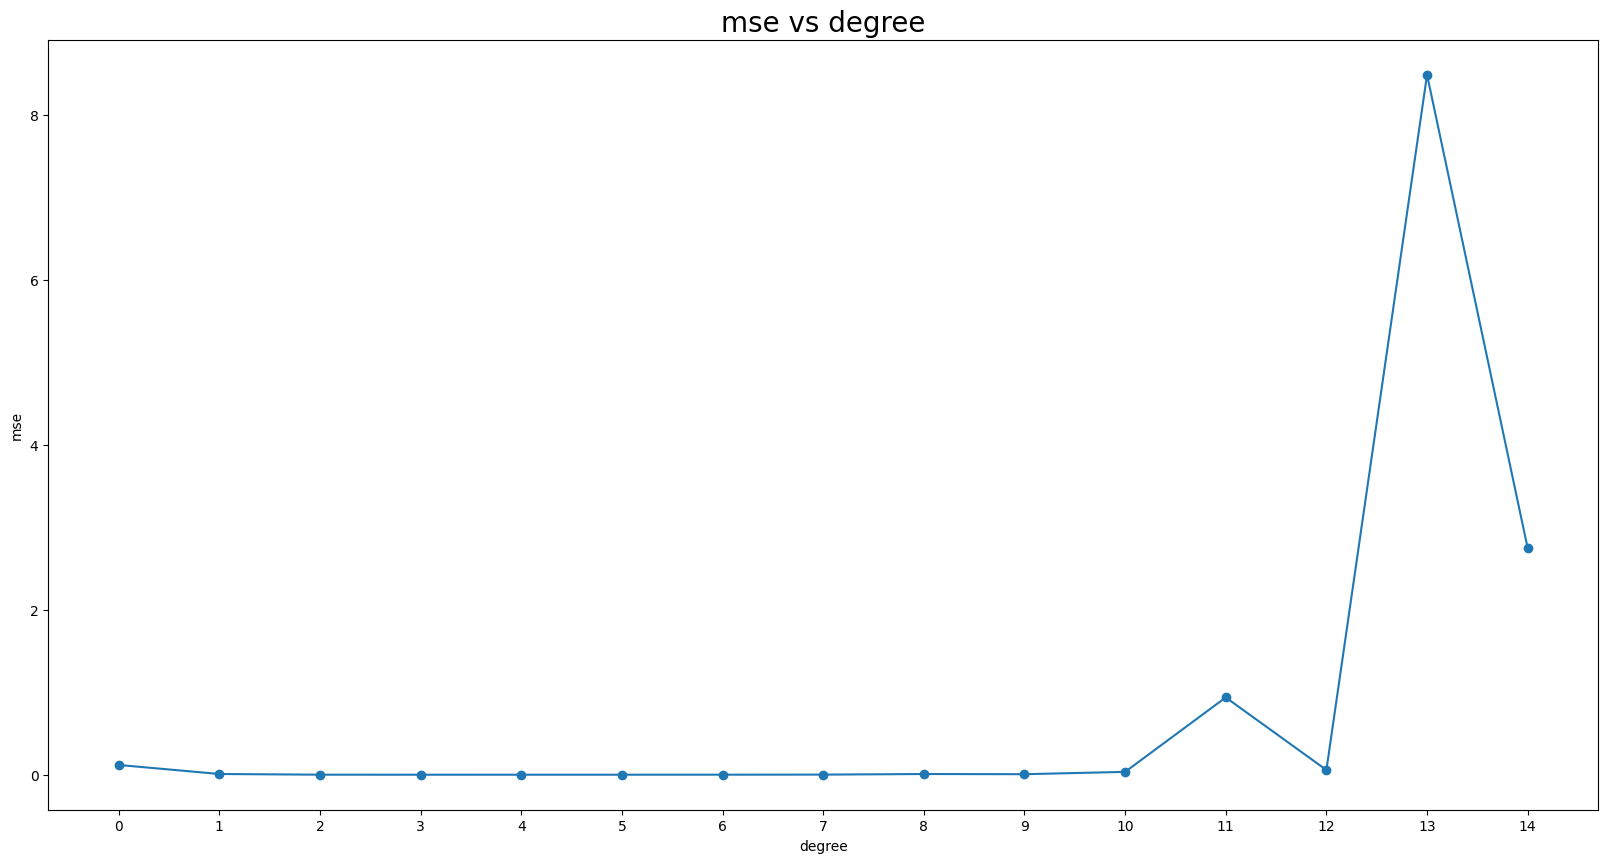

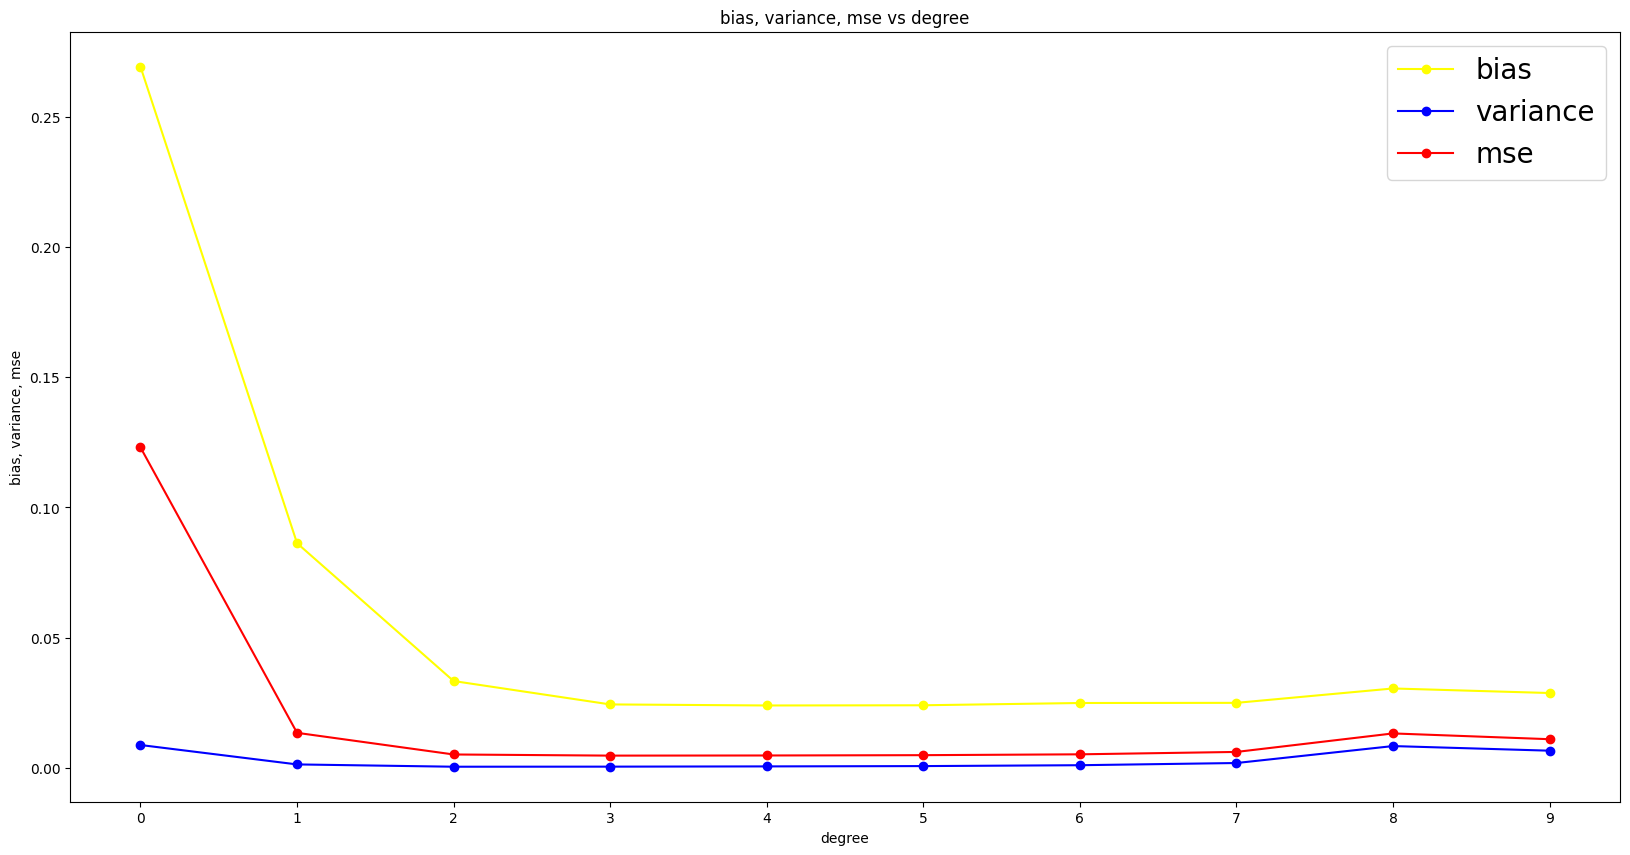

In [73]:
#a graph with matplotlib for bias with 1 to 15 degrees on x axis for sure and bias,bias_square,variance, mse on y axis with large image size and the dots are connected
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(range(0, 15), bias_list, 'o-')
plt.xticks(range(0, 15))
plt.xlabel('degree')
plt.ylabel('bias')
# size of the font of the title
plt.title('bias vs degree', fontsize=20)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(range(0, 15), bias_square_list, 'o-')
plt.xticks(range(0, 15))
plt.xlabel('degree')
plt.ylabel('bias_square')
# size of the font of the title
plt.title('bias_square vs degree', fontsize=20)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(range(0, 15), variance_list, 'o-')
plt.xticks(range(0, 15))
plt.xlabel('degree')
plt.ylabel('variance')
plt.title('variance vs degree', fontsize=20)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(range(0, 15), mse_list, 'o-')
plt.xticks(range(0, 15))
plt.xlabel('degree')
plt.ylabel('mse')
plt.title('mse vs degree', fontsize=20)
plt.show()

bias_temp = bias_list[:10]
variance_temp = variance_list[:10]
mse_temp = mse_list[:10]
plt.figure(figsize=(20, 10))
plt.plot(range(0,10), bias_temp, 'o-', color='yellow', label='bias')
plt.plot(range(0,10), variance_temp, 'o-', color='blue', label='variance')
plt.plot(range(0,10), mse_temp, 'o-', color='red', label='mse')
plt.xticks(range(0,10))
plt.xlabel('degree')
plt.ylabel('bias, variance, mse')
plt.title('bias, variance, mse vs degree')
plt.legend(prop={'size': 20})
plt.show()
# NOTE : The graph is only drawn for the first 10 degrees for better visualization